In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import math
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
from sklearn.metrics import r2_score
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import FTestPower
def rmnan(arr):
    cleanedset = arr
    rmarr = list()
    for i in range(len(cleanedset)):
        if math.isnan(cleanedset[i]):
            rmarr.append(i-len(rmarr))
    for i in rmarr:
        cleanedset.pop(i)
    return cleanedset

def mean(arr):
    return sum(arr)/len(arr)

def median(arr):
    arr = sort(arr)
    return (arr[math.ceil(len(arr)/2)]+arr[math.floor(len(arr)/2)])/2

def vartype(arr):
    catquant = list()
    for i in range(len(arr[0])):
        if(type(arr[0][i]) == int):
            catquant.append("Quantitative")
        elif(type(arr[0][i]) == float):
            catquant.append("Quantitative")
        else:
            catquant.append("Categorical")
    return catquant

def stdev(arr):
    avg = mean(arr)
    total = 0;
    for i in arr:
        total += math.pow(i-avg,2)
    return math.sqrt(total/(len(arr)-1))

def IQR(arr):
    arr = sort(arr)
    q1 = (arr[math.ceil(len(arr)/4)]+arr[math.floor(len(arr)/4)])/2
    q3 = (arr[math.ceil(3*len(arr)/4)]+arr[math.floor(3*len(arr)/4)])/2
    return q3-q1;

def split(arr):
    arr1 = list()
    arr2 = list()
    for i in range(0,int(len(arr)/2)):
        arr1.append(arr[i])
    for i in range(int(len(arr)/2),len(arr)):
        arr2.append(arr[i])
    return arr1, arr2

def merge(arr1, arr2):
    for i in arr2:
        for j in range(len(arr1)):
            if(arr1[j]>i):
                arr1.insert(j,i)
    return arr1

def sort(arr):
    if len(arr) == 1:
        return arr
    a, b = split(arr)
    return merge(sort(a),sort(b))

def favstats(arr):
    q1 = (arr[math.ceil(len(arr)/4)]+arr[math.floor(len(arr)/4)])/2
    q3 = (arr[math.ceil(3*len(arr)/4)]+arr[math.floor(3*len(arr)/4)])/2
    med = median(arr)
    return [min(arr),q1,med,q3,max(arr)]

def quantile(arr,num=4):
    arr = sort(arr)
    out = list();
    for i in range(num):
        print(arr[int(len(arr)*i/num)])
        out.append(arr[int(len(arr)*i/num)])
    out.append(arr[len(arr)-1])
    return out

In [2]:
muscle = pd.read_csv("musclemass.csv")
muscle

,Age,MuscleMass
0,43,106
1,41,106
2,47,97
3,46,113
4,45,96
5,41,119
6,47,92
7,41,112
8,48,92
9,48,102


<AxesSubplot:xlabel='Age', ylabel='MuscleMass'>

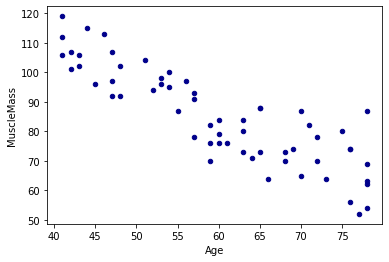

In [3]:
muscle.plot.scatter(x='Age',
                    y='MuscleMass',
                    c='DarkBlue')

 
-1.19 x + 156.3


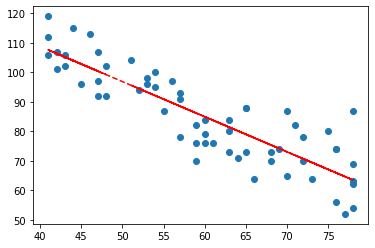

In [4]:
x = muscle.Age
y = muscle.MuscleMass
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 1)
except:
    z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([41, 41, 41, 42, 42, 43, 43, 44, 45, 46, 47, 47, 47, 48, 48, 51, 52,
         53, 53, 54, 54, 55, 56, 

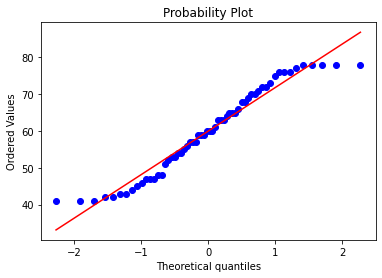

In [5]:
stats.probplot(x, plot=plt)

In [6]:
m = ols('Age ~ MuscleMass',muscle).fit()
m = ols('Age ~ MuscleMass',muscle).fit()
infl = m.get_influence()
smfr = infl.summary_frame()
smfr

,dfb_Intercept,dfb_MuscleMass,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.092671,-0.110255,9.727144e-03,-0.641016,0.045205,-0.139479,-0.637729,-0.138763
1,0.143114,-0.170268,2.297305e-02,-0.985112,0.045205,-0.214350,-0.984857,-0.214295
2,0.066038,-0.089936,1.129089e-02,-0.919618,0.026008,-0.150272,-0.918376,-0.150069
3,-0.130390,0.148848,1.487178e-02,0.641722,0.067361,0.172463,0.638437,0.171580
4,0.087949,-0.123563,2.347289e-02,-1.366632,0.024520,-0.216670,-1.377154,-0.218338
5,-0.110911,0.123953,9.529371e-03,0.435313,0.091384,0.138053,0.432250,0.137082
6,0.046663,-0.083660,2.135393e-02,-1.451889,0.019858,-0.206659,-1.466210,-0.208697
7,0.065587,-0.075211,3.887745e-03,-0.337757,0.063809,-0.088179,-0.335162,-0.087501
8,0.041035,-0.073571,1.665104e-02,-1.282081,0.019858,-0.182489,-1.289382,-0.183528
9,0.023801,-0.029487,8.356452e-04,-0.213456,0.035383,-0.040881,-0.211691,-0.040543


In [7]:
y_pred = []
for age in muscle.Age.tolist():
   y_pred.append(-1.19*age+156.3) 
r2 = r2_score(muscle.MuscleMass, y_pred)
r2

0.750058330358794

In [8]:
print(-1.19+57*1.677)
print(-1.19-57*1.677)

94.399
-96.779


In [9]:
avg = mean(muscle.MuscleMass.tolist())

TTestPower().power(effect_size = 0.15, nobs = 59, alpha = 0.05, df=57)

#Both F & T power tests failed using the value: 0.8389166


0.20506919098561976

# CATS

In [10]:
cats = pd.read_csv("cats.csv")
cats

,Unnamed: 0,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3
5,6,F,2.1,7.6
6,7,F,2.1,8.1
7,8,F,2.1,8.2
8,9,F,2.1,8.3
9,10,F,2.1,8.5


In [11]:
avg = mean(cats.Hwt.tolist())

FTestPower().power(effect_size = 0.15, df_num = 1, df_denom = 139, alpha = 0.05)
#Both F & T power tests failed using the value: 0.9999682

0.05057293292348819

 
4.034 x - 0.3567


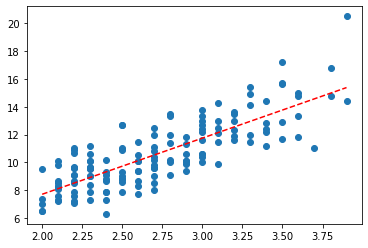

,dfb_Intercept,dfb_Hwt,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.069956,0.062259,2.818647e-03,-0.494941,0.022495,-0.075082,-0.493621,-0.074882
1,-0.091687,0.080284,5.057713e-03,-0.717752,0.019257,-0.100575,-0.716522,-0.100403
2,-0.107540,0.074042,1.508795e-02,-1.881472,0.008452,-0.173712,-1.898650,-0.175298
3,-0.034585,0.030545,7.044379e-04,-0.257356,0.020829,-0.037535,-0.256508,-0.037411
4,-0.041019,0.036076,1.002426e-03,-0.313180,0.020031,-0.044776,-0.312184,-0.044633
5,-0.058024,0.050321,2.088928e-03,-0.480417,0.017780,-0.064636,-0.479112,-0.064461
6,-0.078793,0.066309,4.232014e-03,-0.758478,0.014499,-0.092000,-0.757338,-0.091862
7,-0.081821,0.068353,4.674836e-03,-0.814009,0.013914,-0.096694,-0.813037,-0.096578
8,-0.084475,0.070013,5.115888e-03,-0.869517,0.013352,-0.101152,-0.868766,-0.101065
9,-0.088667,0.072186,5.985656e-03,-0.980474,0.012300,-0.109413,-0.980339,-0.109398


In [12]:
x = cats.Bwt
y = cats.Hwt
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 1)
except:
    z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()
m = ols('Bwt ~ Hwt',cats).fit()
m = ols('Bwt ~ Hwt',cats).fit()
infl = m.get_influence()
smfr = infl.summary_frame()
smfr

In [13]:
y_pred = []
for wt in cats.Bwt.tolist():
   y_pred.append(4.034*wt-0.3567) 
r2 = r2_score(cats.Hwt, y_pred)
r2

0.646620905709151

Male Cats
 
4.313 x - 1.184


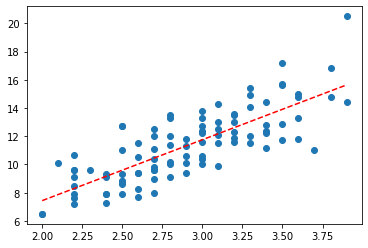

Ttest_indResult(statistic=-32.09152580389518, pvalue=4.3559442599276015e-79)

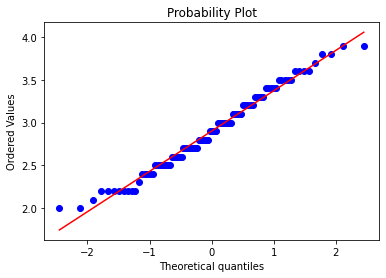

In [14]:
mcats = list()
fcats = list()
for v in cats.values.tolist():
    if v[1] == "F":
        fcats.append(v)
    else:
        mcats.append(v)
mcats = pd.DataFrame(mcats,columns = ["ID","Sex","Bwt","Hwt"])
fcats = pd.DataFrame(fcats,columns = ["ID","Sex","Bwt","Hwt"])
# Male Cats
print("Male Cats")
x = mcats.Bwt
y = mcats.Hwt
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 1)
except:
    z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()
stats.probplot(x, plot=plt)
stats.ttest_ind(x,y)

In [15]:
m = ols('Bwt ~ Hwt',mcats).fit()
m = ols('Bwt ~ Hwt',mcats).fit()
infl = m.get_influence()
smfr = infl.summary_frame()
smfr

,dfb_Intercept,dfb_Hwt,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.151936,0.139356,1.244687e-02,-0.704244,0.047794,-0.157778,-0.702363,-0.157356
1,-0.151936,0.139356,1.244687e-02,-0.704244,0.047794,-0.157778,-0.702363,-0.157356
2,-0.157253,0.110207,3.076929e-02,-2.185614,0.012719,-0.248070,-2.230892,-0.253209
3,-0.065571,0.059089,2.425193e-03,-0.351852,0.037702,-0.069645,-0.350223,-0.069322
4,-0.094975,0.084494,5.255409e-03,-0.558092,0.032645,-0.102522,-0.556060,-0.102149
5,-0.112636,0.099061,7.625374e-03,-0.712193,0.029190,-0.123494,-0.710334,-0.123171
6,-0.136900,0.116881,1.230933e-02,-1.019217,0.023150,-0.156903,-1.019428,-0.156936
7,-0.146663,0.119822,1.634093e-02,-1.325141,0.018271,-0.180781,-1.330503,-0.181513
8,-0.143811,0.110965,1.911786e-02,-1.579636,0.015092,-0.195540,-1.592351,-0.197114
9,-0.143811,0.110965,1.911786e-02,-1.579636,0.015092,-0.195540,-1.592351,-0.197114


In [16]:
y_pred = []
for bwt in mcats.Bwt.tolist():
   y_pred.append(2.636*bwt+2.981) 
r2 = r2_score(mcats.Hwt, y_pred)
r2

0.4578298214157539

           4          3         2
-0.002922 x + 0.1308 x - 2.168 x + 16.07 x - 45.91


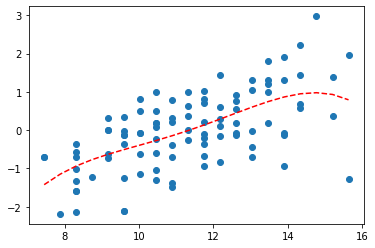

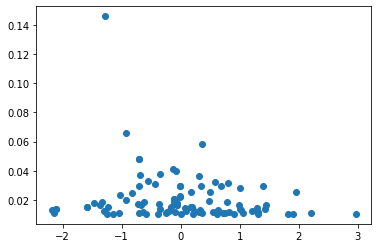

In [17]:
x = list()
for i in range(len(smfr.values.tolist())):
    x.append(4.313*mcats.Bwt.tolist()[i]-1.184)
y = smfr.standard_resid
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 4)
except:
    z = np.polyfit(x, y, 4)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()
plt.scatter(smfr.standard_resid, smfr.hat_diag)
plt.show()

Female Cats:
 
2.636 x + 2.981


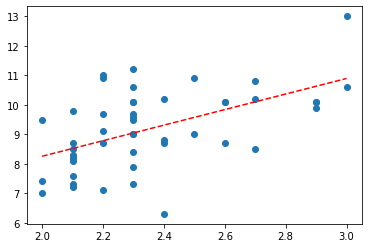

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([2. , 2. , 2. , 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.2,
         2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
         2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 2.6, 2.6, 2.6,
         2.7, 2.7, 2.7, 2.9, 2.9, 2.9, 3. , 3. ])),
 (0.26697426148168574, 

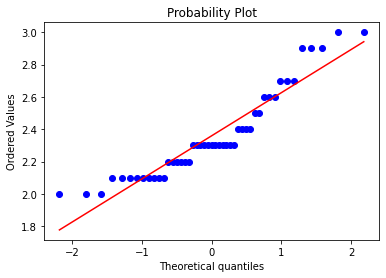

In [18]:
#Female Cats
print("Female Cats:")
x = fcats.Bwt
y = fcats.Hwt
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 1)
except:
    z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()
stats.probplot(x, plot=plt)

In [19]:
m = ols('Bwt ~ Hwt',fcats).fit()
m = ols('Bwt ~ Hwt',fcats).fit()
infl = m.get_influence()
xmfr = infl.summary_frame()
xmfr

,dfb_Intercept,dfb_Hwt,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.145648,0.135159,0.012732,-0.546841,0.078469,-0.159572,-0.542536,-0.158316
1,-0.160819,0.146578,0.016887,-0.730141,0.059579,-0.183778,-0.726298,-0.182810
2,0.019090,-0.056435,0.032542,-1.688331,0.022323,-0.255115,-1.724994,-0.260655
3,-0.047706,0.043912,0.001429,-0.197032,0.068553,-0.053453,-0.194914,-0.052878
4,-0.056233,0.051519,0.002031,-0.243862,0.063948,-0.063739,-0.241296,-0.063069
5,-0.075321,0.067821,0.003992,-0.383277,0.051549,-0.089355,-0.379615,-0.088501
6,-0.086492,0.074209,0.006940,-0.613168,0.035602,-0.117813,-0.608866,-0.116986
7,-0.085734,0.072466,0.007437,-0.658936,0.033121,-0.121957,-0.654739,-0.121180
8,-0.083994,0.069731,0.007910,-0.704673,0.030875,-0.125777,-0.700676,-0.125063
9,-0.077581,0.061290,0.008824,-0.796121,0.027091,-0.132848,-0.792829,-0.132298


In [20]:
y_pred = []
for bwt in fcats.Bwt.tolist():
   y_pred.append(2.636*bwt+2.981) 
r2 = r2_score(fcats.Hwt, y_pred)
r2

0.28307591912916064

 
0.6755 x - 6.481


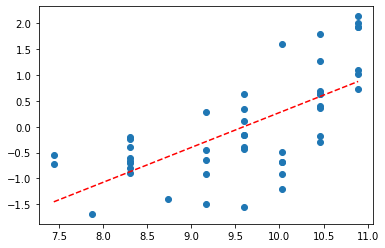

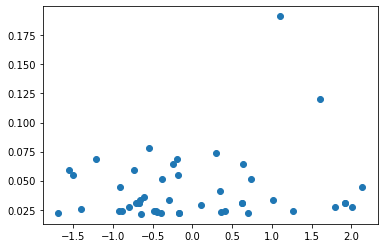

Ttest_indResult(statistic=46.027525929937674, pvalue=2.6017953741928844e-65)

In [21]:
x = list()
for i in range(len(xmfr.values.tolist())):
    x.append(4.313*mcats.Bwt.tolist()[i]-1.184)
y = xmfr.standard_resid
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 1)
except:
    z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()
plt.scatter(xmfr.standard_resid, xmfr.hat_diag)
plt.show()
stats.ttest_ind(x,y)

In [22]:
'''
1)Linear Regression
2)QQ Plot
3)Residuals V Fitted
4)Residuals V Leverage
'''

'\n1)Linear Regression\n2)QQ Plot\n3)Residuals V Fitted\n4)Residuals V Leverage\n'

# Scenario 3

In [23]:
salinas = pd.read_csv("salinas.csv")
salinas

,discharge,sediment
0,300.00,1553.21
1,309.70,1636.85
2,319.71,1907.36
3,330.05,1949.19
4,340.72,1636.81
5,351.73,1751.52
6,363.10,1849.80
7,374.84,1829.63
8,386.96,1867.79
9,399.47,1781.79


 
0.1323 x + 1902


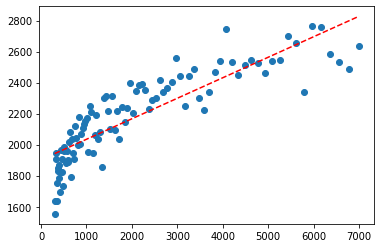

,dfb_Intercept,dfb_Hwt,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.069956,0.062259,2.818647e-03,-0.494941,0.022495,-0.075082,-0.493621,-0.074882
1,-0.091687,0.080284,5.057713e-03,-0.717752,0.019257,-0.100575,-0.716522,-0.100403
2,-0.107540,0.074042,1.508795e-02,-1.881472,0.008452,-0.173712,-1.898650,-0.175298
3,-0.034585,0.030545,7.044379e-04,-0.257356,0.020829,-0.037535,-0.256508,-0.037411
4,-0.041019,0.036076,1.002426e-03,-0.313180,0.020031,-0.044776,-0.312184,-0.044633
5,-0.058024,0.050321,2.088928e-03,-0.480417,0.017780,-0.064636,-0.479112,-0.064461
6,-0.078793,0.066309,4.232014e-03,-0.758478,0.014499,-0.092000,-0.757338,-0.091862
7,-0.081821,0.068353,4.674836e-03,-0.814009,0.013914,-0.096694,-0.813037,-0.096578
8,-0.084475,0.070013,5.115888e-03,-0.869517,0.013352,-0.101152,-0.868766,-0.101065
9,-0.088667,0.072186,5.985656e-03,-0.980474,0.012300,-0.109413,-0.980339,-0.109398


In [24]:
x = salinas.discharge
y = salinas.sediment
plt.scatter(x, y)
try:
    z = np.polyfit(x, y, 1)
except:
    z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p)
plt.plot(x,p(x),"r--")
plt.show()
m = ols('Bwt ~ Hwt',cats).fit()
m = ols('Bwt ~ Hwt',cats).fit()
infl = m.get_influence()
smfr = infl.summary_frame()
smfr